<a href="https://colab.research.google.com/github/ned717/UW-Madison-ALP-Computer-Science/blob/main/Day5_ALP_CompSci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning 2
Linear Regression as our model to analyze housing data.


In [ ]:
# Import many libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
housing_file_path = '/content/housing.csv' #housing.csv = file path
data = pd.read_csv(housing_file_path) # data is the info inside file path

In [ ]:
data.columns #print the columns inside the file

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
data.head(10) # enter the number of rows you want, and prints all columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info() # shows the data types and null values
#float equals int plus decimal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data["ocean_proximity"].unique() # in that column there are 5 different inputs throughout the data set

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#Missing Data Analysis (Cleaning Data)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each cloumn
missing_percentage = (missing_values / len(data))*100

# How to display the missing data stats
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
# Remove the rows with missing data
data_cleaned1 = data.dropna()

# verify that it worked
print("Missing Values in Each Column after cleaning:\n")
print(data_cleaned1.isnull().sum())

Missing Values in Each Column after cleaning:

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualization

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0, 0.5, 'Frequency')

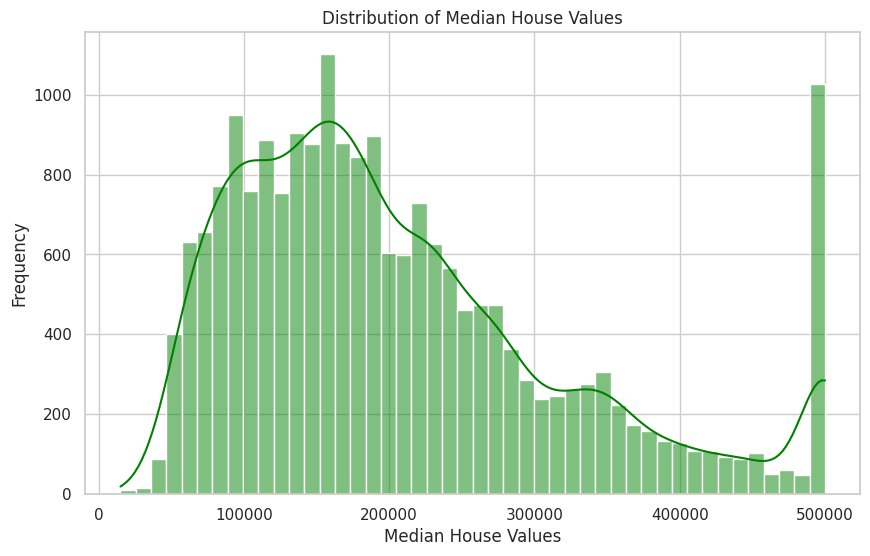

In [ ]:
sns.set(style = "whitegrid") # we are creating a graph/plot of the median house value
plt.figure(figsize=(10,6)) # Create the visual graph
sns.histplot(data_cleaned1['median_house_value'], color='green', kde=True)
plt.title ('Distribution of Median House Values')
plt.xlabel('Median House Values')
plt.ylabel('Frequency')


#Using Interquartile Range to Remove Outliers

In [ ]:
# Assuming the data is your data frame and median house value is the column of interest

Q1 = data_cleaned1['median_house_value'].quantile(0.25)
print(Q1)

Q3 = data_cleaned1['median_house_value'].quantile(0.75)
print(Q3)

IQR = Q3 - Q1
print(IQR)

119500.0
264700.0
145200.0


#GOOOOOG

In [ ]:
# Define the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

# Now lets remove outliers

#data_no_outliers1 =  data_cleaned1[(data_cleaned1['median_house_value'] >= lower_bound) & (data_cleaned1['median_house_value'] <= upper_bound)]

# Now check after

#print("Original data shape:", data_cleaned1.shape)
#print("New data shape without outliers:", data_no_outliers1.shape)
#print(IQR)
print(lower_bound)
print(upper_bound)


-98300.0
482500.0


# Box Plot for Outlier Detection
## Outliers in median income

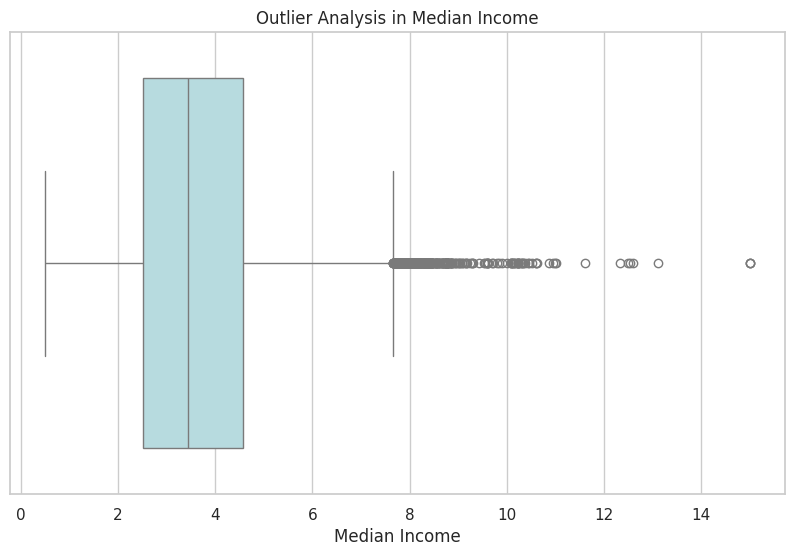

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers1['median_income'], color='powderblue')
plt.title("Outlier Analysis in Median Income" )
plt.xlabel('Median Income')
plt.show()

#Checking

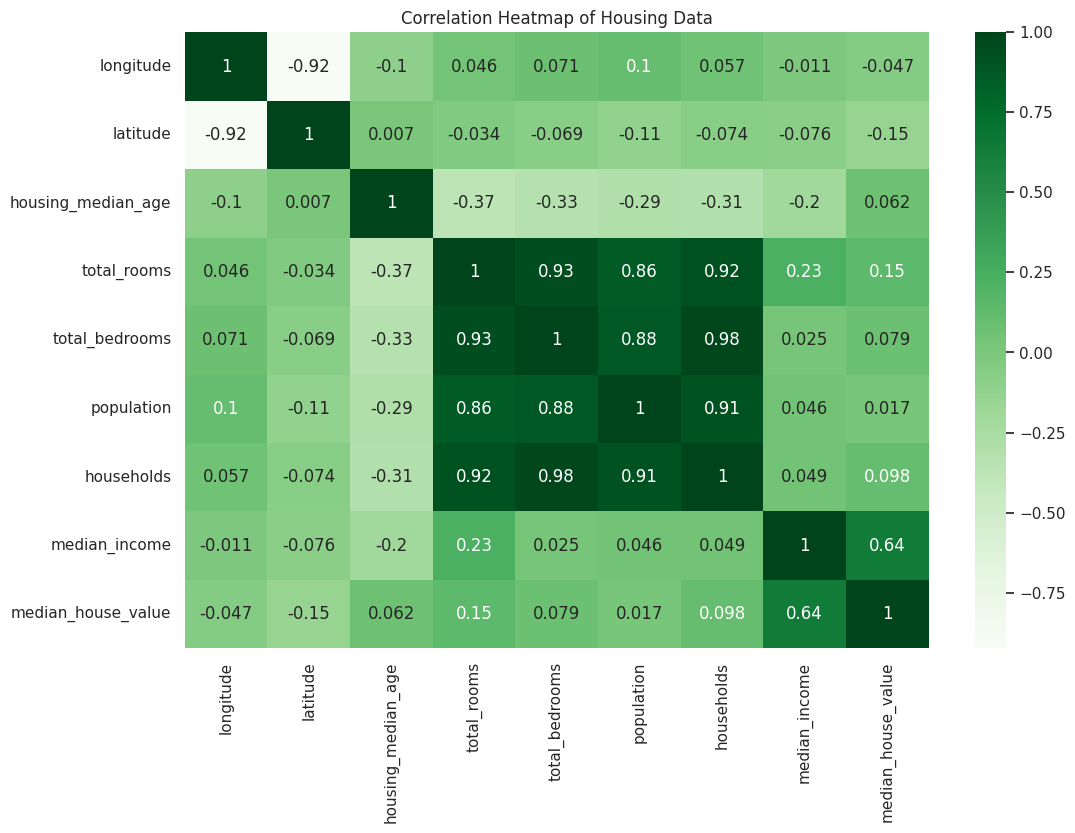

In [ ]:
# Calculate Q1 and Q3
#Q1 = data_no_outliers1['median_income'].quantile(0.25)
#Q3 = data_no_outliers1['median_income'].quantile(0.75)
#IQR = Q3 - Q1

# Define the bounds for the outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers2 = data_no_outliers1[(data_no_outliers1['median_house_value'] >= lower_bound) & (data_no_outliers1['median_house_value'] <= upper_bound)]

numeric_data = data_no_outliers2.select_dtypes(include=[np.number])
data_cleaned2 = numeric_data

plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned2.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

# Correlation HeatMap

Explain why we drop total bedrooms?

We drop it because it has a high correlation with households and total_bedrooms and gives no new information for training the new model.

In [ ]:
data_cleaned2 = data.drop("total_bedrooms" , axis = 1)

In [ ]:
data_cleaned2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# Unique values in ocean proximity
data_no_outliers2 = data_no_outliers1[(data_no_outliers1['median_income']>= lower_bound) & (data_no_outliers1['median_income'] <= upper_bound)]
data_cleaned3 = data_no_outliers2
data_cleaned3 = data_cleaned3.drop ("total_bedrooms" , axis = 1)
data_cleaned3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
for column in ['ocean_proximity']:
  print(f"Unique values in {column}:" , data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization to Dummy Variable Method

It is helpful in linear regression

In [ ]:
ocean_proximity_dummies = pd.get_dummies(data_cleaned3['ocean_proximity'], prefix = 'ocean_proximity').astype(int)
data_cleaned3 = pd.concat([data_cleaned3.drop("ocean_proximity" , axis = 1), ocean_proximity_dummies], axis = 1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data_cleaned3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data_cleaned3.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0


In [ ]:
data_cleaned3 = data_cleaned3.drop("ocean_proximity_ISLAND", axis = 1)
data_cleaned3.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

#Splitting Data into Train and Test

In [ ]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

target = ['median_house_value']

x = data_cleaned3[features]
y = data_cleaned3[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 777)

print(f'Training set size: {x_train.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')

Training set size: 15495 samples
Test set size: 3874 samples


#GOOF

In [ ]:
x_test

x_train_const = sm.add_constant(x_train)

model_fitted = sm.OLS(y_train, x_train_const).fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2278.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:19:01   Log-Likelihood:            -1.9223e+05
No. Observations:               15495   AIC:                         3.845e+05
Df Residuals:                   15483   BIC:                         3.846e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#Predicting and Testing

In [ ]:
x_test_const = sm.add_constant(x_test)

#Make predictions
test_predictions = model_fitted.predict(x_test_const)
test_predictions

15873    215427.412702
18116    323533.213100
2150     108793.789306
2494      63761.860990
9606     111928.508584
             ...      
6497      82383.357865
11846     33528.031115
18167    270969.908825
14372    368351.781688
3157     114206.207934
Length: 3874, dtype: float64

# Checking OLS Assumptions


##Assumption 1: Linearity

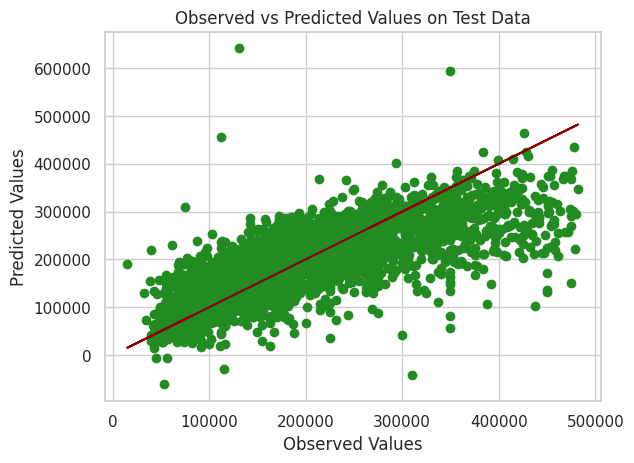

In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # line for perfect prediction (true values)
plt.show()


##Assumption 2: Random Sample

In [ ]:
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


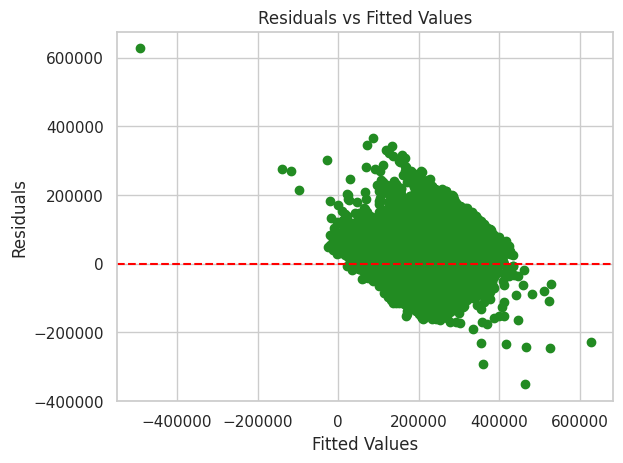

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

##Assumption 3: Exogeneity (We have independent variables)

In [ ]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in x_train.columns:
  corr_coefficient = np.corrcoef(x_train[column], residuals)[0, 1]
print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


##Assumption 4: Homoskedasticty